In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
df= pd.read_csv('https://raw.githubusercontent.com/mredshaw/Ecommerce_Sales_Analysis/main/data/sales_data.csv')

I'm going to look at the preliminary data to get an idea of what the dataset has, and what needs to be cleaned.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [7]:
df.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,947,946,945.000000,946.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_45,Region_9,NaN,NaN,2022-07-28
freq,28,109,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


In [8]:
print(df.head())

      Product    Region   Price  Units Sold   Sale Date
0         NaN  Region_6   75.96        10.0  2022-01-01
1         NaN  Region_1  175.78         8.0  2022-01-02
2  Product_46  Region_3   20.43        12.0  2022-01-03
3  Product_36  Region_1   12.77        10.0  2022-01-04
4  Product_17  Region_6  125.69         6.0  2022-01-05


In [9]:
print(df.dtypes)

Product        object
Region         object
Price         float64
Units Sold    float64
Sale Date      object
dtype: object


In [10]:
print(df.describe)

<bound method NDFrame.describe of          Product    Region   Price  Units Sold   Sale Date
0            NaN  Region_6   75.96        10.0  2022-01-01
1            NaN  Region_1  175.78         8.0  2022-01-02
2     Product_46  Region_3   20.43        12.0  2022-01-03
3     Product_36  Region_1   12.77        10.0  2022-01-04
4     Product_17  Region_6  125.69         6.0  2022-01-05
...          ...       ...     ...         ...         ...
1045  Product_45  Region_7   78.69         8.0  2022-07-28
1046   Product_1  Region_6     NaN         8.0  2022-08-02
1047  Product_17  Region_2  114.37        11.0  2023-12-18
1048         NaN  Region_8     NaN         5.0  2023-12-27
1049  Product_16  Region_2   69.30         8.0  2024-02-23

[1050 rows x 5 columns]>


In [11]:
print(df.isnull())

      Product  Region  Price  Units Sold  Sale Date
0        True   False  False       False      False
1        True   False  False       False      False
2       False   False  False       False      False
3       False   False  False       False      False
4       False   False  False       False      False
...       ...     ...    ...         ...        ...
1045    False   False  False       False      False
1046    False   False   True       False      False
1047    False   False  False       False      False
1048     True   False   True       False      False
1049    False   False  False       False      False

[1050 rows x 5 columns]


<Axes: xlabel='Units Sold', ylabel='Count'>

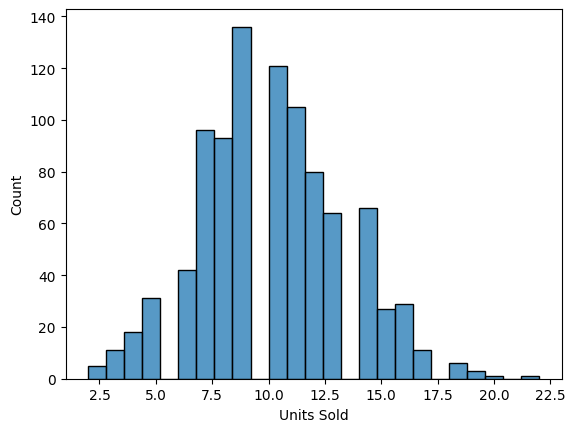

In [12]:
sns.histplot(df['Units Sold'])

Going to check how many sales each product has recorded in terms of number of transactions.

In [13]:
num_of_products = df['Product'].value_counts()
print(num_of_products)

Product_45    28
Product_5     28
Product_33    27
Product_1     26
Product_13    25
Product_30    24
Product_4     23
Product_43    23
Product_48    23
Product_29    23
Product_23    22
Product_40    22
Product_31    22
Product_37    21
Product_50    21
Product_15    20
Product_44    20
Product_42    20
Product_46    20
Product_19    20
Product_14    20
Product_17    20
Product_16    20
Product_35    19
Product_39    19
Product_41    19
Product_10    19
Product_2     19
Product_6     19
Product_7     18
Product_20    18
Product_28    17
Product_34    17
Product_25    17
Product_22    16
Product_8     16
Product_24    16
Product_32    16
Product_27    16
Product_21    15
Product_9     15
Product_18    14
Product_38    14
Product_11    14
Product_47    13
Product_36    13
Product_26    13
Product_49    13
Product_12    13
Product_3     11
Name: Product, dtype: int64


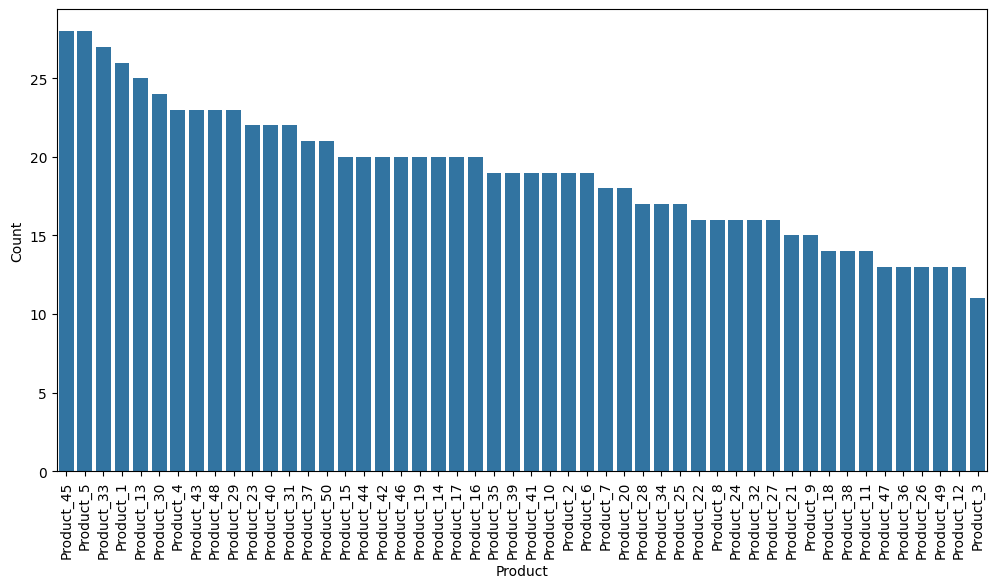

In [14]:
plt.figure(figsize=(12, 6))
sns.barplot(x=num_of_products.index, y=num_of_products.values)
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.ylabel('Count')
plt.show()

Based on this, we can see that Product_45 has the most sales attributed to it, and Product 3 has the least (not to be confused with total units sold)

To begin the cleaning process, I want to ensure the values being used make sense. Many of the price entries included values past two decimal points. This doesn't make much sense in regards to pricing values, so I'll begin making a new DataFrame by rounding all the values of that column to two decimal places.

In [15]:
df_clean = df.round({'price': 2})
print(df_clean)

         Product    Region   Price  Units Sold   Sale Date
0            NaN  Region_6   75.96        10.0  2022-01-01
1            NaN  Region_1  175.78         8.0  2022-01-02
2     Product_46  Region_3   20.43        12.0  2022-01-03
3     Product_36  Region_1   12.77        10.0  2022-01-04
4     Product_17  Region_6  125.69         6.0  2022-01-05
...          ...       ...     ...         ...         ...
1045  Product_45  Region_7   78.69         8.0  2022-07-28
1046   Product_1  Region_6     NaN         8.0  2022-08-02
1047  Product_17  Region_2  114.37        11.0  2023-12-18
1048         NaN  Region_8     NaN         5.0  2023-12-27
1049  Product_16  Region_2   69.30         8.0  2024-02-23

[1050 rows x 5 columns]


In [16]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


I want to drop any duplicate entries. Any sales accidentally entered twice could really skew the data:

In [17]:
df_clean.drop_duplicates(inplace=True)

In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     900 non-null    object 
 1   Region      900 non-null    object 
 2   Price       900 non-null    float64
 3   Units Sold  900 non-null    float64
 4   Sale Date   1000 non-null   object 
dtypes: float64(2), object(3)
memory usage: 46.9+ KB


Going to start by checking the data that is missing Units Sold data

In [19]:
na_units_sold = df[df['Units Sold'].isna()]
print(na_units_sold)

         Product     Region   Price  Units Sold   Sale Date
16    Product_43   Region_6   68.53         NaN  2022-01-17
62     Product_5  Region_10   71.01         NaN  2022-03-04
81    Product_23   Region_5    9.93         NaN  2022-03-23
86     Product_5   Region_6   44.88         NaN  2022-03-28
93    Product_29   Region_6   87.63         NaN  2022-04-04
...          ...        ...     ...         ...         ...
990          NaN   Region_2     NaN         NaN  2024-09-17
1005  Product_15        NaN   59.91         NaN  2022-05-17
1012  Product_40   Region_8   92.70         NaN  2023-05-17
1013  Product_22   Region_9  141.53         NaN  2022-05-26
1040  Product_44   Region_9  101.69         NaN  2024-09-11

[104 rows x 5 columns]


Checking to see how many times 'Units Sold' has NA value:

In [20]:
na_units_sold_count = df['Units Sold'].isna().sum()
print(na_units_sold_count)


104


Will check the same for empty price data. Trying to get an idea of how to tackle the missing data.

In [21]:
na_price = df[df['Price'].isna()]
print(na_price)

         Product    Region  Price  Units Sold   Sale Date
10    Product_20  Region_3    NaN         8.0  2022-01-11
12     Product_2  Region_3    NaN         6.0  2022-01-13
51    Product_17  Region_5    NaN        12.0  2022-02-21
59    Product_12  Region_8    NaN         7.0  2022-03-01
63    Product_33       NaN    NaN         6.0  2022-03-05
...          ...       ...    ...         ...         ...
1002  Product_13  Region_3    NaN         8.0  2022-04-05
1006  Product_41  Region_3    NaN        18.0  2023-01-26
1028  Product_42  Region_6    NaN         8.0  2024-01-19
1046   Product_1  Region_6    NaN         8.0  2022-08-02
1048         NaN  Region_8    NaN         5.0  2023-12-27

[105 rows x 5 columns]


In [22]:
na_price_count = df_clean['Price'].isnull().sum()
print(na_price_count)

100


In order to fill some of the missing 'Price' column entries, the ones that had a product listed, I want to fill the price value with the average of the price of that corresponding product. I'll do this by grouping the data by product and then finding the mean of the price of those products and filling the missing price data with that=

In [23]:
df_clean['Price'].fillna(df_clean.groupby('Product')['Price'].transform('mean'), inplace=True)

Now I'll check to see how many were filled and which null prices remain.

In [24]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     900 non-null    object 
 1   Region      900 non-null    object 
 2   Price       989 non-null    float64
 3   Units Sold  900 non-null    float64
 4   Sale Date   1000 non-null   object 
dtypes: float64(2), object(3)
memory usage: 46.9+ KB


In [25]:
df_clean[df_clean['Price'].isnull()]

,Product,Region,Price,Units Sold,Sale Date
91,NaN,Region_5,NaN,14.0,2022-04-02
224,NaN,Region_8,NaN,7.0,2022-08-13
272,NaN,NaN,NaN,NaN,2022-09-30
307,NaN,Region_8,NaN,5.0,2022-11-04
412,NaN,Region_10,NaN,9.0,2023-02-17
664,NaN,Region_10,NaN,14.0,2023-10-27
725,NaN,Region_8,NaN,5.0,2023-12-27
740,NaN,Region_5,NaN,10.0,2024-01-11
826,NaN,Region_10,NaN,13.0,2024-04-06
966,NaN,Region_2,NaN,13.0,2024-08-24


Because the remaining NaN price data also has NaN product information, and there's only 11 entries that this applies to, I will remove them from the data as it wouldn't impact the overall results much at all.

In [26]:
df_clean.dropna(subset=['Price'], inplace=True)

Now checking the data to make sure it is still holding true to original data.

In [27]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     900 non-null    object 
 1   Region      890 non-null    object 
 2   Price       989 non-null    float64
 3   Units Sold  891 non-null    float64
 4   Sale Date   989 non-null    object 
dtypes: float64(2), object(3)
memory usage: 46.4+ KB


In [28]:
print(df_clean.describe(include='all'))


          Product    Region        Price  Units Sold   Sale Date
count         900       890   989.000000  891.000000         989
unique         50        10          NaN         NaN         989
top     Product_5  Region_9          NaN         NaN  2022-01-01
freq           28       104          NaN         NaN           1
mean          NaN       NaN   106.543353   10.068462         NaN
std           NaN       NaN   118.608495    3.162779         NaN
min           NaN       NaN     0.200000    2.000000         NaN
25%           NaN       NaN    32.690000    8.000000         NaN
50%           NaN       NaN    83.006842   10.000000         NaN
75%           NaN       NaN   138.050000   12.000000         NaN
max           NaN       NaN  2143.300000   22.000000         NaN


In [29]:
print(df.describe(include='all'))

           Product    Region        Price  Units Sold   Sale Date
count          947       946   945.000000  946.000000        1050
unique          50        10          NaN         NaN        1000
top     Product_45  Region_9          NaN         NaN  2022-07-28
freq            28       109          NaN         NaN           2
mean           NaN       NaN   107.598688   10.048626         NaN
std            NaN       NaN   124.020322    3.172261         NaN
min            NaN       NaN     0.200000    2.000000         NaN
25%            NaN       NaN    29.430000    8.000000         NaN
50%            NaN       NaN    78.130000   10.000000         NaN
75%            NaN       NaN   142.570000   12.000000         NaN
max            NaN       NaN  2143.300000   22.000000         NaN


When looking at the two DataFrames, there seems to be an outlier in price, so I'm going to check that visually using a scatter plot:

<Axes: xlabel='Product', ylabel='Price'>

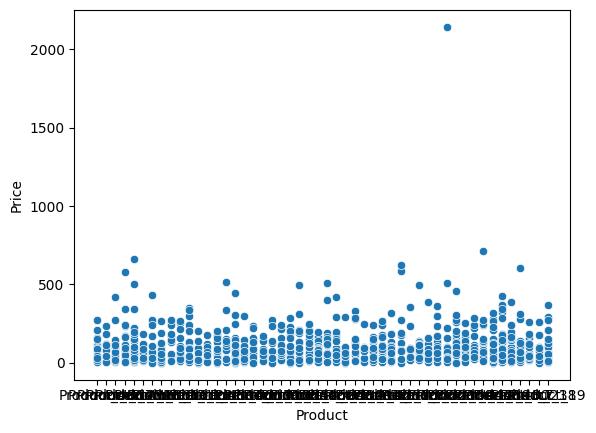

In [30]:
sns.scatterplot(data= df_clean, x = 'Product', y = 'Price')

Now I want to check to see which entry is causing the outlier:

In [31]:
df_clean[df_clean['Price'] > 1000]

,Product,Region,Price,Units Sold,Sale Date
969,Product_15,Region_8,2143.3,5.0,2024-08-27


Because this price was likely incorreclty input, I can check the average price of the other Product_15 sales, and replace this data with that average:

In [32]:
product_15_mean_price = df_clean[(df_clean['Product'] == 'Product_15') & (df_clean['Price'] < 2000)]['Price'].mean()


I will now replace the outlier price value with the mean we found for the prices of the other product_15 entries:

In [33]:
df_clean.loc[(df_clean['Product'] == 'Product_15') & (df_clean['Price'] > 2000), 'Price'] = product_15_mean_price.round(2)

I'll now check to see how the scatterplot improved:

<Axes: xlabel='Product', ylabel='Price'>

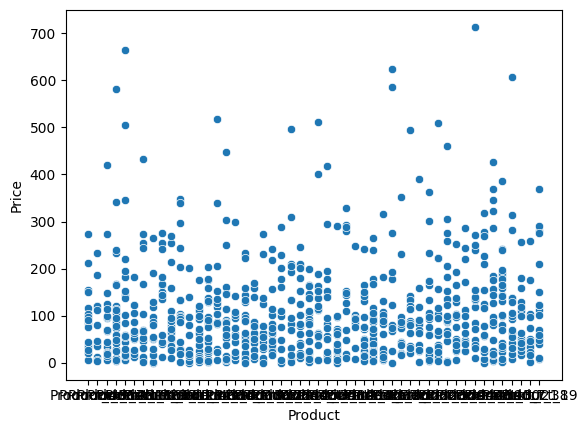

In [34]:
sns.scatterplot(data= df_clean, x = 'Product', y = 'Price')

Now I want to check that nothing odd has happened with the data from the original dataframe.

In [35]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     900 non-null    object 
 1   Region      890 non-null    object 
 2   Price       989 non-null    float64
 3   Units Sold  891 non-null    float64
 4   Sale Date   989 non-null    object 
dtypes: float64(2), object(3)
memory usage: 46.4+ KB


In [36]:
df_clean.describe(include = 'all')

,Product,Region,Price,Units Sold,Sale Date
count,900,890,989.000000,891.000000,989
unique,50,10,NaN,NaN,989
top,Product_5,Region_9,NaN,NaN,2022-01-01
freq,28,104,NaN,NaN,1
mean,NaN,NaN,104.494404,10.068462,NaN
std,NaN,NaN,99.323301,3.162779,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,32.690000,8.000000,NaN
50%,NaN,NaN,83.006842,10.000000,NaN
75%,NaN,NaN,137.660000,12.000000,NaN


In [37]:
df.describe(include = 'all')

,Product,Region,Price,Units Sold,Sale Date
count,947,946,945.000000,946.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_45,Region_9,NaN,NaN,2022-07-28
freq,28,109,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


In [38]:
print(df_clean[df_clean['Units Sold'].isnull()])

        Product     Region   Price  Units Sold   Sale Date
16   Product_43   Region_6   68.53         NaN  2022-01-17
62    Product_5  Region_10   71.01         NaN  2022-03-04
81   Product_23   Region_5    9.93         NaN  2022-03-23
86    Product_5   Region_6   44.88         NaN  2022-03-28
93   Product_29   Region_6   87.63         NaN  2022-04-04
..          ...        ...     ...         ...         ...
968  Product_45  Region_10    5.48         NaN  2024-08-26
971  Product_11   Region_5   77.22         NaN  2024-08-29
979  Product_21   Region_8  118.93         NaN  2024-09-06
984  Product_44   Region_9  101.69         NaN  2024-09-11
988  Product_42   Region_9  240.97         NaN  2024-09-15

[98 rows x 5 columns]


For the missing units sold, my thought is that it would be appropriate to calculate the average order size per product and assume that amount was sold when there's no entry.

In [39]:
df_clean['Units Sold'].fillna(df_clean.groupby('Product')['Units Sold'].transform('mean'), inplace=True)

In [40]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     900 non-null    object 
 1   Region      890 non-null    object 
 2   Price       989 non-null    float64
 3   Units Sold  982 non-null    float64
 4   Sale Date   989 non-null    object 
dtypes: float64(2), object(3)
memory usage: 46.4+ KB


In [41]:
print(df_clean[df_clean['Units Sold'].isnull()])

    Product     Region   Price  Units Sold   Sale Date
301     NaN   Region_2  133.75         NaN  2022-10-29
340     NaN   Region_1   36.82         NaN  2022-12-07
567     NaN   Region_4  266.88         NaN  2023-07-22
806     NaN   Region_9    7.58         NaN  2024-03-17
817     NaN   Region_3  101.54         NaN  2024-03-28
851     NaN  Region_10  195.71         NaN  2024-05-01
872     NaN  Region_10  135.39         NaN  2024-05-22


These remaining 7 entries have no Product or Units Sold data, so I'll go ahead and drop these from our DataFrame

In [42]:
df_clean.dropna(subset=['Units Sold'], inplace=True)

In [43]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 982 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     900 non-null    object 
 1   Region      883 non-null    object 
 2   Price       982 non-null    float64
 3   Units Sold  982 non-null    float64
 4   Sale Date   982 non-null    object 
dtypes: float64(2), object(3)
memory usage: 46.0+ KB


In [44]:
df_clean.describe(include='all')


,Product,Region,Price,Units Sold,Sale Date
count,900,883,982.000000,982.000000,982
unique,50,10,NaN,NaN,982
top,Product_5,Region_9,NaN,NaN,2022-01-01
freq,28,103,NaN,NaN,1
mean,NaN,NaN,104.345515,10.061387,NaN
std,NaN,NaN,99.418463,3.025656,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,32.555000,8.000000,NaN
50%,NaN,NaN,82.650000,10.000000,NaN
75%,NaN,NaN,137.615000,12.000000,NaN


In [45]:
df.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,947,946,945.000000,946.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_45,Region_9,NaN,NaN,2022-07-28
freq,28,109,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


In [46]:
df_clean.dtypes

Product        object
Region         object
Price         float64
Units Sold    float64
Sale Date      object
dtype: object

Since all the units sold columns are currently floats and should be whole numbers, I'm going to change them to integer to ensure data makes sense.

In [47]:
df_clean['Units Sold'] = df_clean['Units Sold'].astype(int)

In [48]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 982 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     900 non-null    object 
 1   Region      883 non-null    object 
 2   Price       982 non-null    float64
 3   Units Sold  982 non-null    int64  
 4   Sale Date   982 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 46.0+ KB


I now want to review the data that has null products.

In [49]:
product_is_null = df_clean[df_clean['Product'].isnull()]

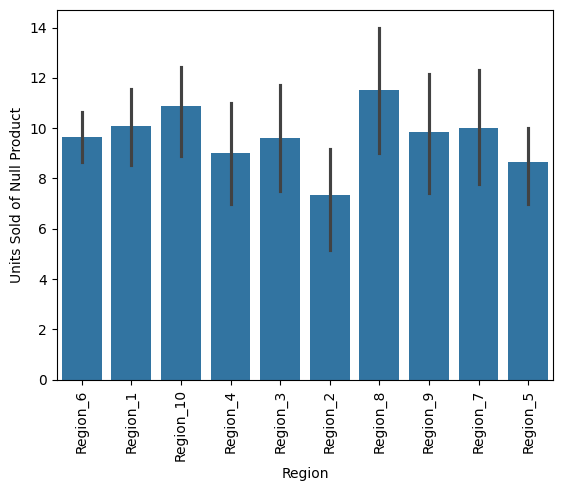

In [50]:
sns.barplot(data=product_is_null, x='Region', y='Units Sold')
plt.xticks(rotation=90)
plt.ylabel('Units Sold of Null Product')
plt.show()

To enable further analysis, I want to add a column to my DataFrame called 'Revenue' which would simply be the product of price and units sold:

In [51]:
df_clean['Revenue'] = df_clean['Price'] * df_clean['Units Sold']

In [52]:
df_clean

,Product,Region,Price,Units Sold,Sale Date,Revenue
0,NaN,Region_6,75.96,10,2022-01-01,759.60
1,NaN,Region_1,175.78,8,2022-01-02,1406.24
2,Product_46,Region_3,20.43,12,2022-01-03,245.16
3,Product_36,Region_1,12.77,10,2022-01-04,127.70
4,Product_17,Region_6,125.69,6,2022-01-05,754.14
...,...,...,...,...,...,...
995,NaN,Region_7,31.83,13,2024-09-22,413.79
996,Product_36,NaN,46.19,9,2024-09-23,415.71
997,NaN,Region_7,311.80,13,2024-09-24,4053.40
998,Product_2,Region_10,43.44,15,2024-09-25,651.60


I now want to review the entries that have no product information to decide how to handle this data clean up using Revenue. 

In [53]:
product_is_null = df_clean[df_clean['Product'].isnull()]

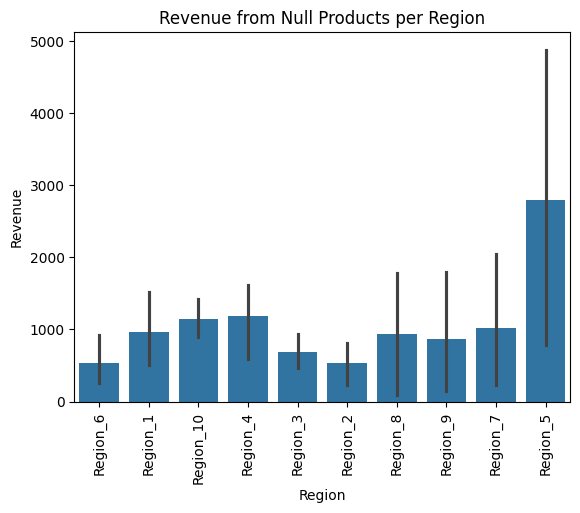

In [54]:
sns.barplot(data=product_is_null, x='Region', y='Revenue')
plt.xticks(rotation=90)
plt.title('Revenue from Null Products per Region')
plt.show()

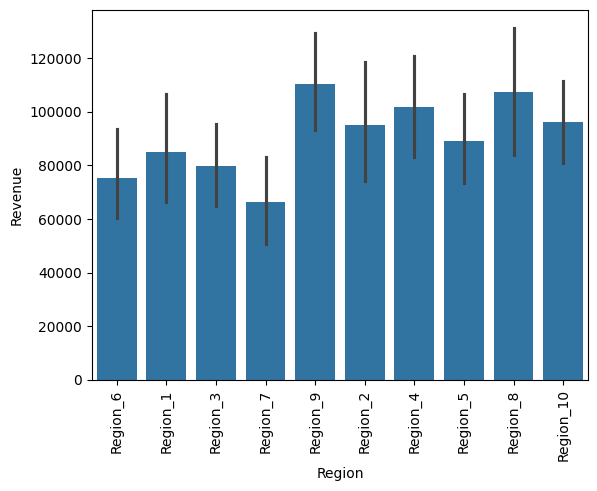

In [55]:
sns.barplot(data=df_clean, x='Region', y='Revenue', estimator=sum)
plt.xticks(rotation=90)
plt.show()

This plot shows that Region_5 has a lot revenue coming from sales where the Product was not marked down. Because it's significant, I want to find a way to fill in these null entries that will maintain the credibility of the data. I'm thinking of using average product price to assume that whatever sale price is closest to the average sale price of produxt x, that sale was from product x.

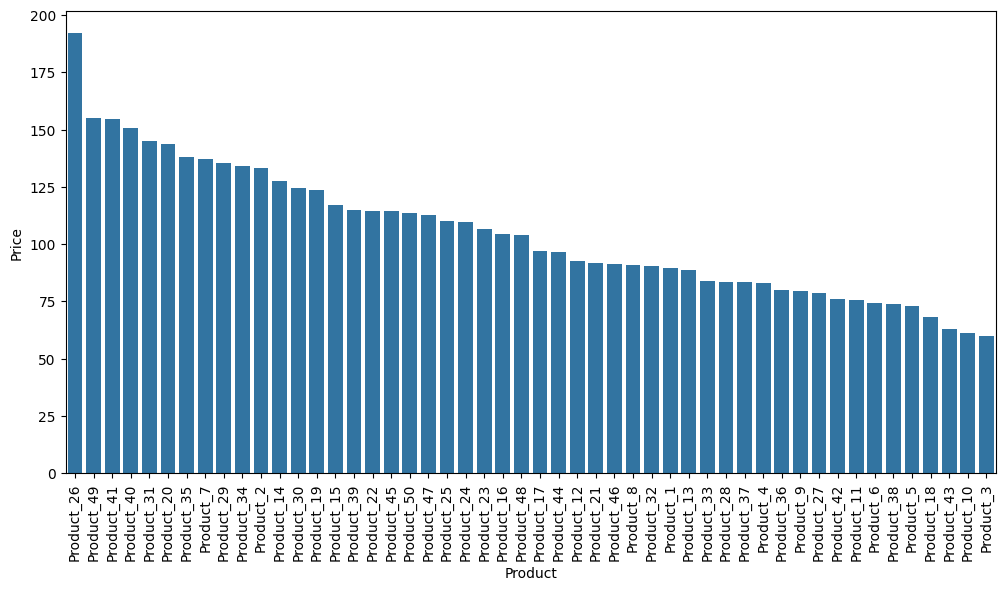

In [56]:

avg_price = df_clean.groupby('Product')['Price'].mean().reset_index()
avg_price_sorted = avg_price.sort_values(by='Price', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price_sorted, x='Product', y='Price')
plt.xticks(rotation=90)
plt.show()



In [57]:
print(avg_price)

       Product       Price
0    Product_1   89.652857
1   Product_10   61.264286
2   Product_11   75.495385
3   Product_12   92.660000
4   Product_13   88.530000
5   Product_14  127.552778
6   Product_15  116.885509
7   Product_16  104.196471
8   Product_17   96.859412
9   Product_18   67.986154
10  Product_19  123.740000
11   Product_2  133.226875
12  Product_20  143.814167
13  Product_21   91.728667
14  Product_22  114.403333
15  Product_23  106.473000
16  Product_24  109.566923
17  Product_25  110.250000
18  Product_26  192.085455
19  Product_27   78.409286
20  Product_28   83.395333
21  Product_29  135.385789
22   Product_3   59.752000
23  Product_30  124.420000
24  Product_31  145.119524
25  Product_32   90.475000
26  Product_33   83.993750
27  Product_34  133.865000
28  Product_35  138.106250
29  Product_36   80.066667
30  Product_37   83.212222
31  Product_38   73.692308
32  Product_39  114.698889
33   Product_4   83.006842
34  Product_40  150.797000
35  Product_41  154.682000
3

With the information about the average price of each individual product, I'll fill the missing product data in the DataFrame by assuming the product sold was the product with the average sale price closest to the sale price of the sale entered. To get a baseline idea of how this change will change the amount of times a product was sold, i'll make a table before and after with this info.

In [58]:
units_sold_table = df_clean.groupby('Product')['Units Sold'].sum().reset_index()
units_sold_table.columns = ['Product', 'Units Sold']
print(units_sold_table)

       Product  Units Sold
0    Product_1         237
1   Product_10         180
2   Product_11         157
3   Product_12         139
4   Product_13         253
5   Product_14         202
6   Product_15         202
7   Product_16         185
8   Product_17         176
9   Product_18         142
10  Product_19         200
11   Product_2         201
12  Product_20         153
13  Product_21         171
14  Product_22         145
15  Product_23         216
16  Product_24         163
17  Product_25         159
18  Product_26         119
19  Product_27         172
20  Product_28         166
21  Product_29         193
22   Product_3         128
23  Product_30         247
24  Product_31         209
25  Product_32         145
26  Product_33         246
27  Product_34         174
28  Product_35         185
29  Product_36         113
30  Product_37         182
31  Product_38         119
32  Product_39         149
33   Product_4         243
34  Product_40         182
35  Product_41         176
3

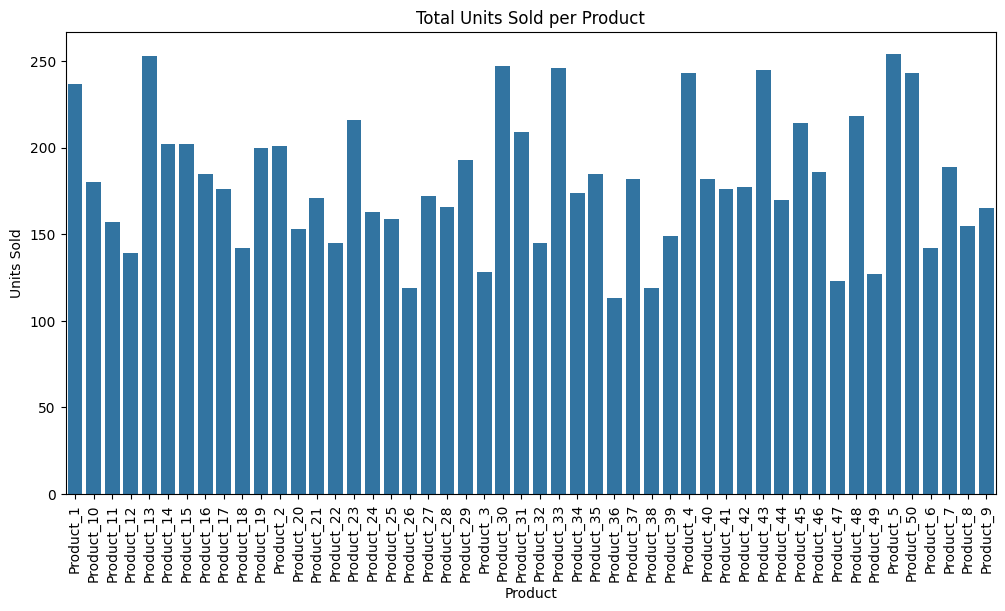

In [59]:
plt.figure(figsize=(12, 6))
sns.barplot(data=units_sold_table, x='Product', y='Units Sold')
plt.xticks(rotation=90)
plt.title('Total Units Sold per Product')
plt.show()

To accomplish the filling of the data this way, I used this function, which looks at the average price data from the average price table for each product, compares it to the value in the price column in df_clean. Then, using idxmin() I'm determining which value has the least difference between the average price of a product and the price in the df_clean dataframe. This will return an index to the 'Product' name which has the least difference. Then, using this information, I fill any of the null Product entries in df_clean with the corresponding closest_product from avg_price table.

In [60]:
#df_clean_test = df_clean

In [61]:
#def find_closest_product(price):
#    differences = np.abs(avg_price['Price'] - price)
#    closest_index = differences.idxmin()
#    return avg_price.loc[closest_index, 'Product']

#df_clean_test['Product'] = df_clean.apply(lambda row: find_closest_product(row['Price'])
#                                     if pd.isnull(row['Product']) else row['Product'], axis=1)


In [62]:
#df_clean_test.info()

We can now see that all missing values other than 99 Region fiels has been filled. I want to review the summary data to ensure nothing major has changed from the original DataFrame:

In [63]:
#df_clean_test.describe(include='all')

In [64]:
#df.describe(include='all')

In [65]:
#units_sold_table = df_clean_test.groupby('Product')['Units Sold'].sum().reset_index()
#units_sold_table.columns = ['Product', 'Units Sold']
#print(units_sold_table[units_sold_table['Product']== 'Product_3'])


In [66]:
#plt.figure(figsize=(12, 6))
#sns.barplot(data=units_sold_table, x='Product', y='Units Sold')
#plt.xticks(rotation=90)
#plt.show()

So here, it appears my original idea of filling it based on average product price was not effective. It applied far more sales to Product 3 than any other product, likely due to it's low average sale price. I've commented out the code here so it doesn't impact the remainder of my work. I must fill the data in a different way. As I don't feel there's any accurate way to do this without skewing the data, I will fill the missing values with 'Unknown Product'

In [67]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 982 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     900 non-null    object 
 1   Region      883 non-null    object 
 2   Price       982 non-null    float64
 3   Units Sold  982 non-null    int64  
 4   Sale Date   982 non-null    object 
 5   Revenue     982 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 53.7+ KB


In [68]:
df_clean['Product'] = df_clean['Product'].fillna('Unknown Product')

In [69]:
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 982 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     982 non-null    object 
 1   Region      883 non-null    object 
 2   Price       982 non-null    float64
 3   Units Sold  982 non-null    int64  
 4   Sale Date   982 non-null    object 
 5   Revenue     982 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 53.7+ KB
None


In [70]:
print([df_clean[df_clean['Product']== 'Unknown Product']])

[             Product     Region   Price  Units Sold   Sale Date  Revenue
0    Unknown Product   Region_6   75.96          10  2022-01-01   759.60
1    Unknown Product   Region_1  175.78           8  2022-01-02  1406.24
18   Unknown Product        NaN  276.27           9  2022-01-19  2486.43
21   Unknown Product        NaN   46.10          14  2022-01-22   645.40
27   Unknown Product  Region_10  193.85          10  2022-01-28  1938.50
..               ...        ...     ...         ...         ...      ...
987  Unknown Product   Region_4   31.66           6  2024-09-14   189.96
989  Unknown Product   Region_5  303.51           9  2024-09-16  2731.59
992  Unknown Product  Region_10  151.70          10  2024-09-19  1517.00
995  Unknown Product   Region_7   31.83          13  2024-09-22   413.79
997  Unknown Product   Region_7  311.80          13  2024-09-24  4053.40

[82 rows x 6 columns]]


In [71]:
print(df_clean[df_clean['Region'].isnull()])

             Product Region   Price  Units Sold   Sale Date  Revenue
18   Unknown Product    NaN  276.27           9  2022-01-19  2486.43
21   Unknown Product    NaN   46.10          14  2022-01-22   645.40
43        Product_35    NaN  112.27           4  2022-02-13   449.08
54        Product_12    NaN   96.49          16  2022-02-24  1543.84
57   Unknown Product    NaN   30.71          12  2022-02-27   368.52
..               ...    ...     ...         ...         ...      ...
949       Product_11    NaN  169.51           9  2024-08-07  1525.59
973       Product_48    NaN   51.00          10  2024-08-31   510.00
975       Product_33    NaN    3.21          10  2024-09-02    32.10
991       Product_21    NaN   41.93          15  2024-09-18   628.95
996       Product_36    NaN   46.19           9  2024-09-23   415.71

[99 rows x 6 columns]


For the remainder of the missing region data, i'm going to fill with 'Unknown Region' as there doesn't seem to be a method to assume this accurately without skewing the data. 

In [72]:
df_clean['Region'] = df_clean['Region'].fillna('Unknown Region')

In [73]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 982 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     982 non-null    object 
 1   Region      982 non-null    object 
 2   Price       982 non-null    float64
 3   Units Sold  982 non-null    int64  
 4   Sale Date   982 non-null    object 
 5   Revenue     982 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 53.7+ KB


In [74]:
df_clean.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date,Revenue
count,982,982,982.000000,982.000000,982,982.000000
unique,51,11,NaN,NaN,982,NaN
top,Unknown Product,Region_9,NaN,NaN,2022-01-01,NaN
freq,82,103,NaN,NaN,1,NaN
mean,NaN,NaN,104.345515,10.016293,NaN,1031.486946
std,NaN,NaN,99.418463,3.030887,NaN,1053.461390
min,NaN,NaN,0.200000,2.000000,NaN,0.990000
25%,NaN,NaN,32.555000,8.000000,NaN,292.530000
50%,NaN,NaN,82.650000,10.000000,NaN,767.160000
75%,NaN,NaN,137.615000,12.000000,NaN,1372.002857


In [75]:
df.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,947,946,945.000000,946.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_45,Region_9,NaN,NaN,2022-07-28
freq,28,109,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


Now all the fields are filled, and the data has maintained close relation to original data, I feel comfortable to start analyzing and drawing some conclusions.

In [76]:
units_sold_table_b = df_clean.groupby('Product')['Units Sold'].sum().reset_index()
units_sold_table_b.columns = ['Product', 'Units Sold']
units_sold_table_b_sorted = units_sold_table_b.sort_values(by='Units Sold', ascending=False)

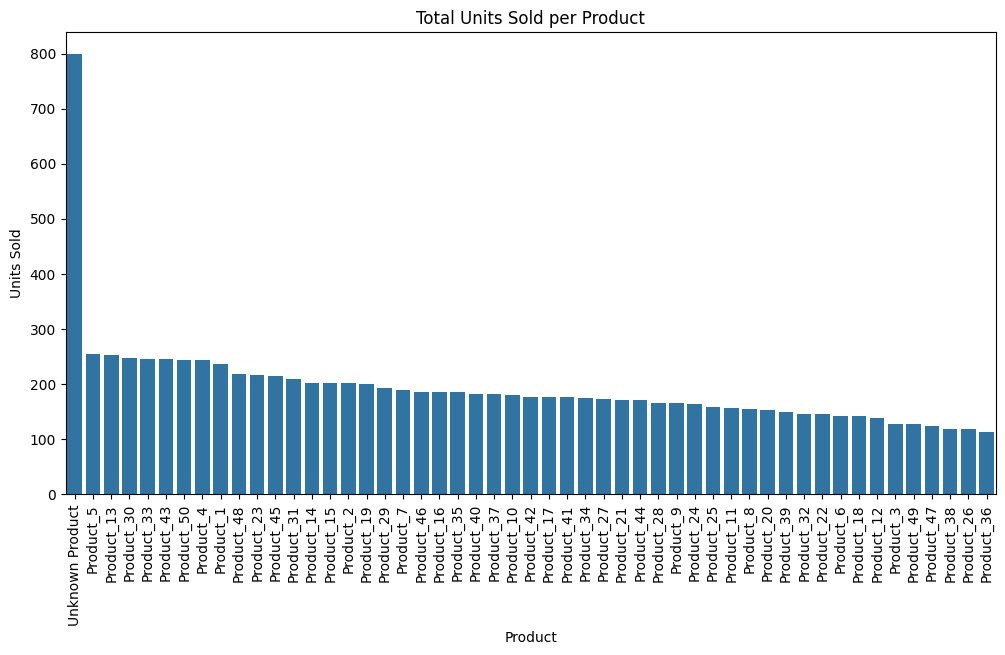

In [77]:
plt.figure(figsize=(12, 6))
sns.barplot(data=units_sold_table_b_sorted, x='Product', y='Units Sold')
plt.title('Total Units Sold per Product')
plt.xticks(rotation=90)
plt.show()

This graph demonstrates the total units sold based on product. We can see how the 'Unknown Product' column includes many units. This shows that the company should work to improve their data entry. to improve their data sets. I want to sort this from highest to lowest to see the best performing products in terms of unit sales and revenue. 

In [78]:
product_revenue_table = df_clean.groupby('Product')['Revenue'].sum().reset_index()
product_revenue_table.columns = ['Product', 'Revenue']
product_revenue_table_sorted = product_revenue_table.sort_values(by='Revenue', ascending=False)

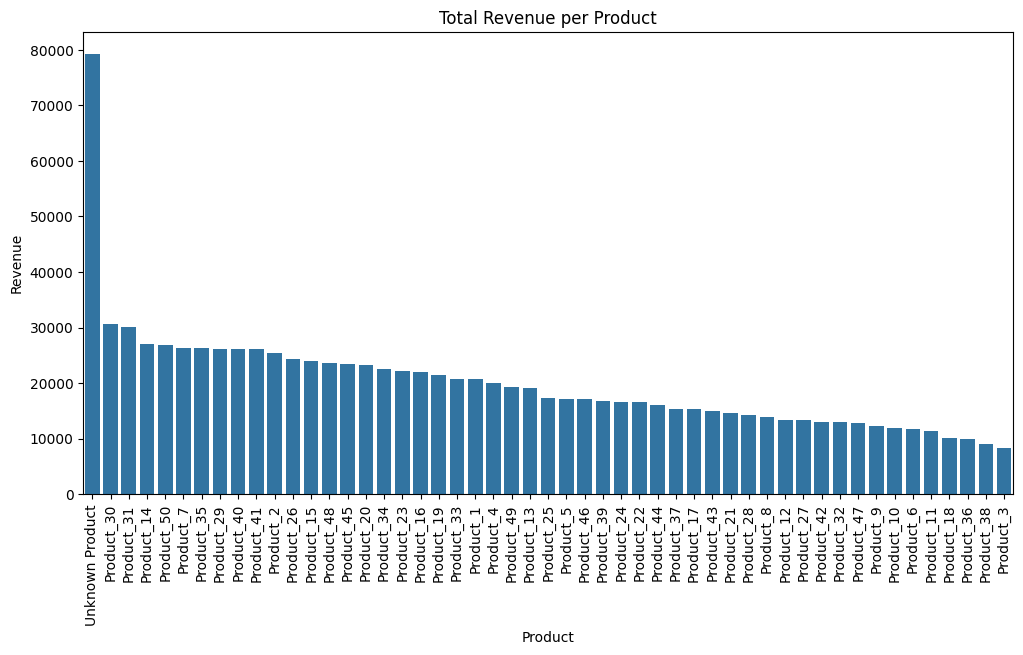

In [79]:
plt.figure(figsize=(12, 6))
sns.barplot(data=product_revenue_table_sorted, x='Product', y='Revenue')
plt.title('Total Revenue per Product')
plt.xticks(rotation=90)
plt.show()

I'd like to compare these two graphs by showcasing the revenue generated per product as well as the units sold per product side by side to see what the relationship is between the two values. To make this possible, I'm going to change it from total revenue and total units sold to % of total revenue and % of total units sold.

In [80]:
total_units_sold = df_clean['Units Sold'].sum()
total_revenue = df_clean['Revenue'].sum()

df_clean['% of Total Units Sold'] = (df_clean['Units Sold'] / total_units_sold) * 100
df_clean['% of Total Revenue'] = (df_clean['Revenue'] / total_revenue) * 100


In [81]:
print(df_clean)

             Product          Region   Price  Units Sold   Sale Date  Revenue  \
0    Unknown Product        Region_6   75.96          10  2022-01-01   759.60   
1    Unknown Product        Region_1  175.78           8  2022-01-02  1406.24   
2         Product_46        Region_3   20.43          12  2022-01-03   245.16   
3         Product_36        Region_1   12.77          10  2022-01-04   127.70   
4         Product_17        Region_6  125.69           6  2022-01-05   754.14   
..               ...             ...     ...         ...         ...      ...   
995  Unknown Product        Region_7   31.83          13  2024-09-22   413.79   
996       Product_36  Unknown Region   46.19           9  2024-09-23   415.71   
997  Unknown Product        Region_7  311.80          13  2024-09-24  4053.40   
998        Product_2       Region_10   43.44          15  2024-09-25   651.60   
999       Product_35        Region_8   56.95           6  2024-09-26   341.70   

     % of Total Units Sold 

In [82]:
product_revenue_percent_table = df_clean.groupby('Product')['% of Total Revenue'].sum().reset_index()
product_revenue_percent_table.columns = ['Product', '% of Total Revenue']
product_revenue_percent_table_sorted = product_revenue_percent_table.sort_values(by='% of Total Revenue', ascending=False)

I want to visualize this data now, removing the unknown product from results to simply deal with known product data.

/var/folders/4r/t2pxznrn4dz28d6ymprq1p9c0000gn/T/ipykernel_10413/2367995048.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.barplot(data=product_revenue_percent_table_sorted[product_revenue_percent_table['Product'] != 'Unknown Product'], x='Product', y='% of Total Revenue')


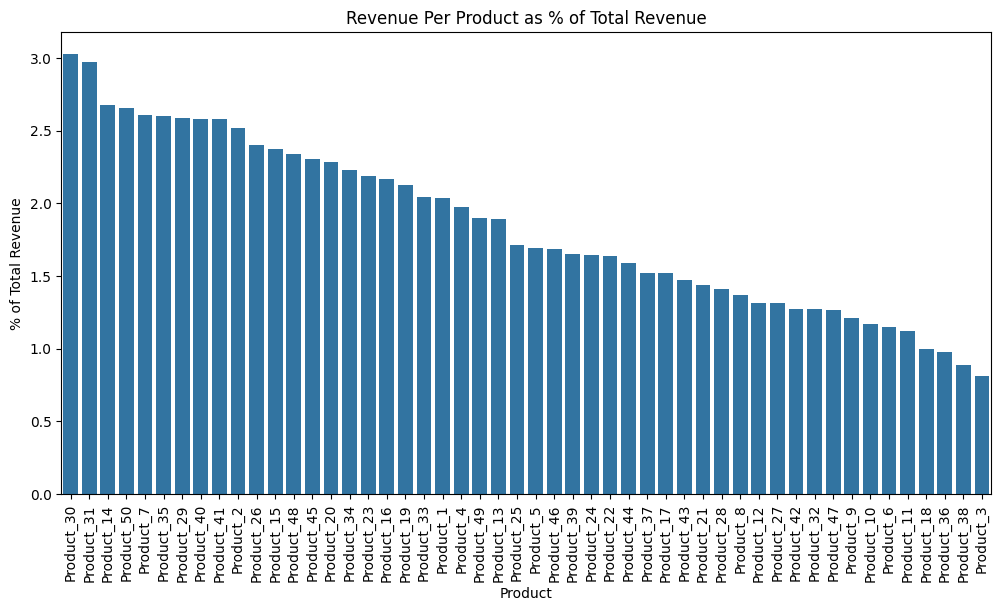

In [83]:
plt.figure(figsize=(12, 6))
sns.barplot(data=product_revenue_percent_table_sorted[product_revenue_percent_table['Product'] != 'Unknown Product'], x='Product', y='% of Total Revenue')
plt.title('Revenue Per Product as % of Total Revenue')
plt.xticks(rotation=90)
plt.show()

In [84]:
product_units_percent_table = df_clean.groupby('Product')['% of Total Units Sold'].sum().reset_index()
product_units_percent_table.columns = ['Product', '% of Total Units Sold']
product_units_percent_table_sorted = product_units_percent_table.sort_values(by='% of Total Units Sold', ascending=False)

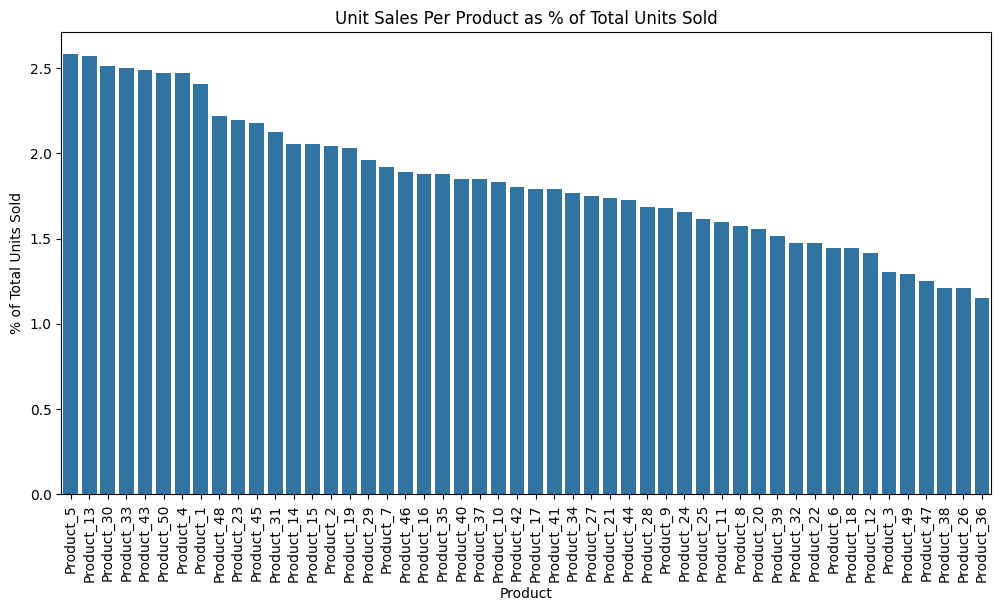

In [85]:
plt.figure(figsize=(12, 6))
sns.barplot(data=product_units_percent_table_sorted[product_units_percent_table_sorted['Product'] != 'Unknown Product'], x='Product', y='% of Total Units Sold')
plt.title('Unit Sales Per Product as % of Total Units Sold')
plt.xticks(rotation=90)
plt.show()

To get a better idea of how each product performs in terms of unit sales vs unit revenue, I want to place the information on a single graph.

/var/folders/4r/t2pxznrn4dz28d6ymprq1p9c0000gn/T/ipykernel_10413/2408400933.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


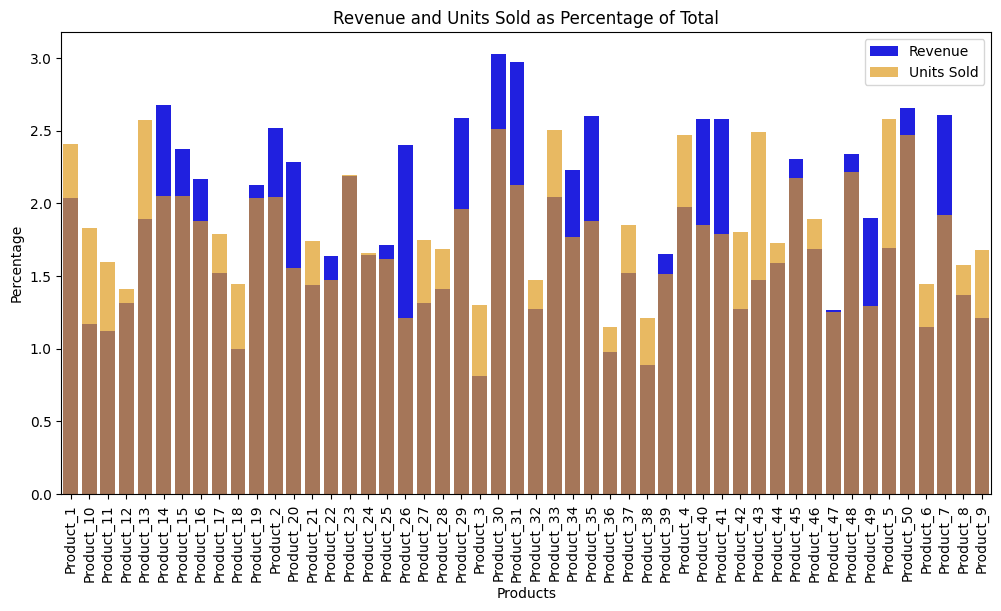

In [86]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=product_revenue_percent_table[product_revenue_percent_table['Product'] != 'Unknown Product'], x='Product', y='% of Total Revenue', color='blue', label='Revenue')
sns.barplot(data=product_units_percent_table[product_units_percent_table['Product'] != 'Unknown Product'], x='Product', y='% of Total Units Sold', color='orange', label='Units Sold', alpha=0.7)
ax.set_xlabel('Products')
ax.set_ylabel('Percentage')
ax.set_title('Revenue and Units Sold as Percentage of Total')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.legend()
plt.show()

This graph showcases how well each Product performs on this % of revenue to % of units sold. Assuming each product has similar profit margins, on a company wide basis, the products with a better revenue to units sold ratio would likely be better products, as they require less resources and result in higher levels of revenue, assuming all else equal. I want to add this column of ratio to my dataframe.

In [87]:
df_clean

,Product,Region,Price,Units Sold,Sale Date,Revenue,% of Total Units Sold,% of Total Revenue
0,Unknown Product,Region_6,75.96,10,2022-01-01,759.60,0.101667,0.074991
1,Unknown Product,Region_1,175.78,8,2022-01-02,1406.24,0.081334,0.138830
2,Product_46,Region_3,20.43,12,2022-01-03,245.16,0.122001,0.024203
3,Product_36,Region_1,12.77,10,2022-01-04,127.70,0.101667,0.012607
4,Product_17,Region_6,125.69,6,2022-01-05,754.14,0.061000,0.074452
...,...,...,...,...,...,...,...,...
995,Unknown Product,Region_7,31.83,13,2024-09-22,413.79,0.132168,0.040851
996,Product_36,Unknown Region,46.19,9,2024-09-23,415.71,0.091501,0.041041
997,Unknown Product,Region_7,311.80,13,2024-09-24,4053.40,0.132168,0.400170
998,Product_2,Region_10,43.44,15,2024-09-25,651.60,0.152501,0.064329


In [88]:
df_clean['Revenue to Units Sold Ratio'] = (df_clean['% of Total Revenue'] / df_clean['% of Total Units Sold'])


In [89]:
df_grouped_ratio = df_clean.groupby('Product')['Revenue to Units Sold Ratio'].sum().reset_index()

In [90]:
df_grouped_ratio_sorted = df_grouped_ratio.sort_values(by='Revenue to Units Sold Ratio', ascending=False)

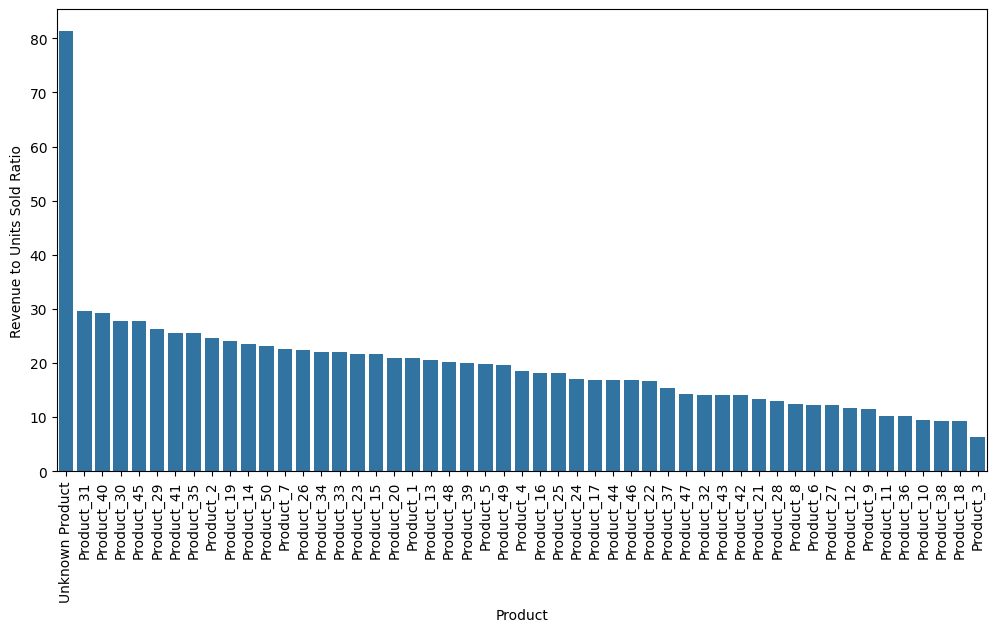

In [91]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped_ratio_sorted, x='Product', y= 'Revenue to Units Sold Ratio')
plt.xticks(rotation=90)
plt.show()

Based off this data, we can see which products are performing the best in terms of it's overall contribution to the companies total revenue, vs the total amount of units this product has sold. In other words, Product_31 has contributed most to the companies revenue compared to how many of the units the company has sold of that product. Prelimenary data would suggest the company should look to increase the sales of Product_31 compared to Product_3. Next I want to review this data on a Region by Region basis.

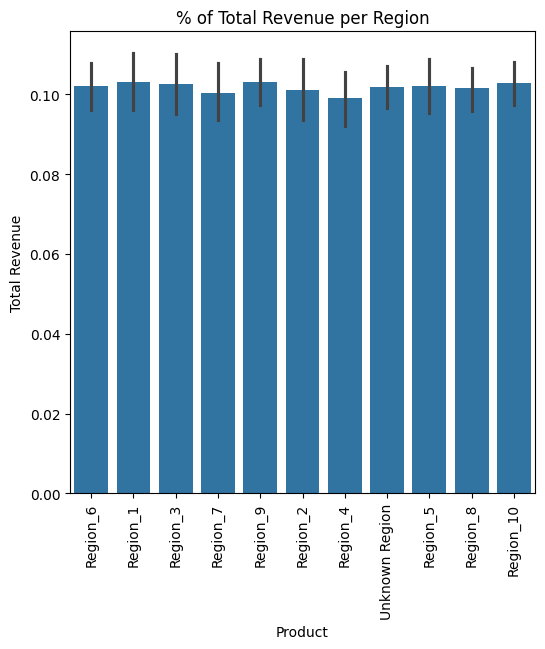

In [92]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df_clean, x='Region', y='% of Total Units Sold')
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.title('% of Total Revenue per Region')
plt.xticks(rotation=90)
plt.show()

I now want to review the performancd of each region so I'll create variables that contain data of each region by itself

In [93]:
df_region_1 = df_clean[df_clean['Region']=='Region_1']
df_region_2 = df_clean[df_clean['Region']=='Region_2']
df_region_3 = df_clean[df_clean['Region']=='Region_3']
df_region_4 = df_clean[df_clean['Region']=='Region_4']
df_region_5 = df_clean[df_clean['Region']=='Region_5']
df_region_6 = df_clean[df_clean['Region']=='Region_6']
df_region_7 = df_clean[df_clean['Region']=='Region_7']
df_region_8 = df_clean[df_clean['Region']=='Region_8']
df_region_9 = df_clean[df_clean['Region']=='Region_9']
df_region_10 = df_clean[df_clean['Region']=='Region_10']

In [94]:
df_grouped_ratio_region1 = df_region_1.groupby('Product')['Revenue to Units Sold Ratio'].sum().reset_index()
df_grouped_ratio_region2 = df_region_2.groupby('Product')['Revenue to Units Sold Ratio'].sum().reset_index()
df_grouped_ratio_region3 = df_region_3.groupby('Product')['Revenue to Units Sold Ratio'].sum().reset_index()
df_grouped_ratio_region4 = df_region_4.groupby('Product')['Revenue to Units Sold Ratio'].sum().reset_index()
df_grouped_ratio_region5 = df_region_5.groupby('Product')['Revenue to Units Sold Ratio'].sum().reset_index()
df_grouped_ratio_region6 = df_region_6.groupby('Product')['Revenue to Units Sold Ratio'].sum().reset_index()
df_grouped_ratio_region7 = df_region_7.groupby('Product')['Revenue to Units Sold Ratio'].sum().reset_index()
df_grouped_ratio_region8 = df_region_8.groupby('Product')['Revenue to Units Sold Ratio'].sum().reset_index()
df_grouped_ratio_region9 = df_region_9.groupby('Product')['Revenue to Units Sold Ratio'].sum().reset_index()
df_grouped_ratio_region10 = df_region_10.groupby('Product')['Revenue to Units Sold Ratio'].sum().reset_index()

In [95]:
df_grouped_ratio_region1_sorted = df_grouped_ratio_region1.sort_values(by='Revenue to Units Sold Ratio', ascending=False)
df_grouped_ratio_region2_sorted = df_grouped_ratio_region2.sort_values(by='Revenue to Units Sold Ratio', ascending=False)
df_grouped_ratio_region3_sorted = df_grouped_ratio_region3.sort_values(by='Revenue to Units Sold Ratio', ascending=False)
df_grouped_ratio_region4_sorted = df_grouped_ratio_region4.sort_values(by='Revenue to Units Sold Ratio', ascending=False)
df_grouped_ratio_region5_sorted = df_grouped_ratio_region5.sort_values(by='Revenue to Units Sold Ratio', ascending=False)
df_grouped_ratio_region6_sorted = df_grouped_ratio_region6.sort_values(by='Revenue to Units Sold Ratio', ascending=False)
df_grouped_ratio_region7_sorted = df_grouped_ratio_region7.sort_values(by='Revenue to Units Sold Ratio', ascending=False)
df_grouped_ratio_region8_sorted = df_grouped_ratio_region8.sort_values(by='Revenue to Units Sold Ratio', ascending=False)
df_grouped_ratio_region9_sorted = df_grouped_ratio_region9.sort_values(by='Revenue to Units Sold Ratio', ascending=False)
df_grouped_ratio_region10_sorted = df_grouped_ratio_region10.sort_values(by='Revenue to Units Sold Ratio', ascending=False)

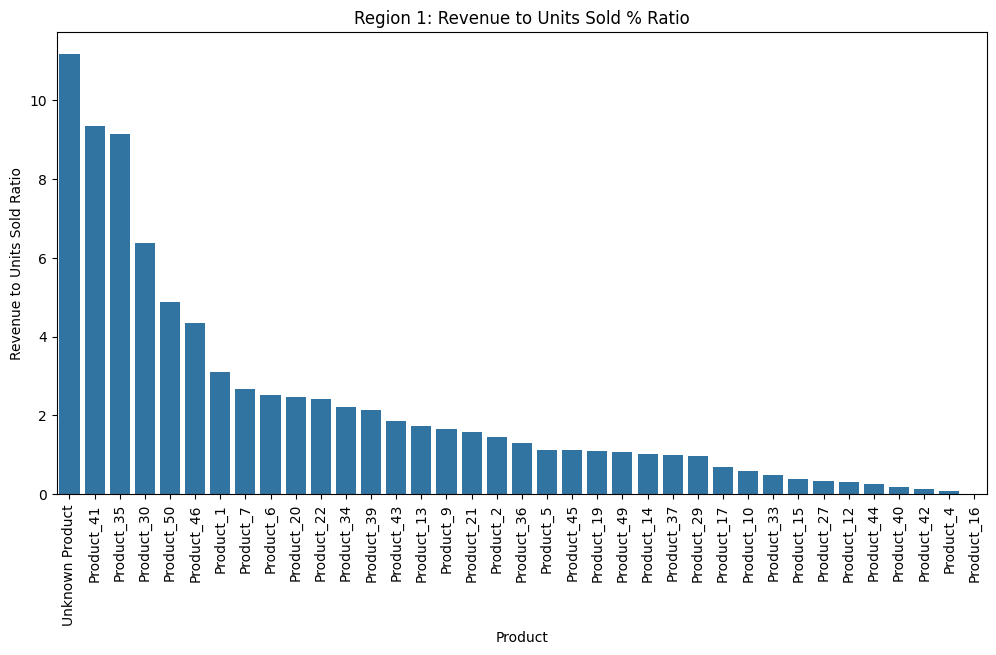

In [96]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped_ratio_region1_sorted, x='Product', y= 'Revenue to Units Sold Ratio')
plt.xticks(rotation=90)
plt.title('Region 1: Revenue to Units Sold % Ratio')
plt.show()

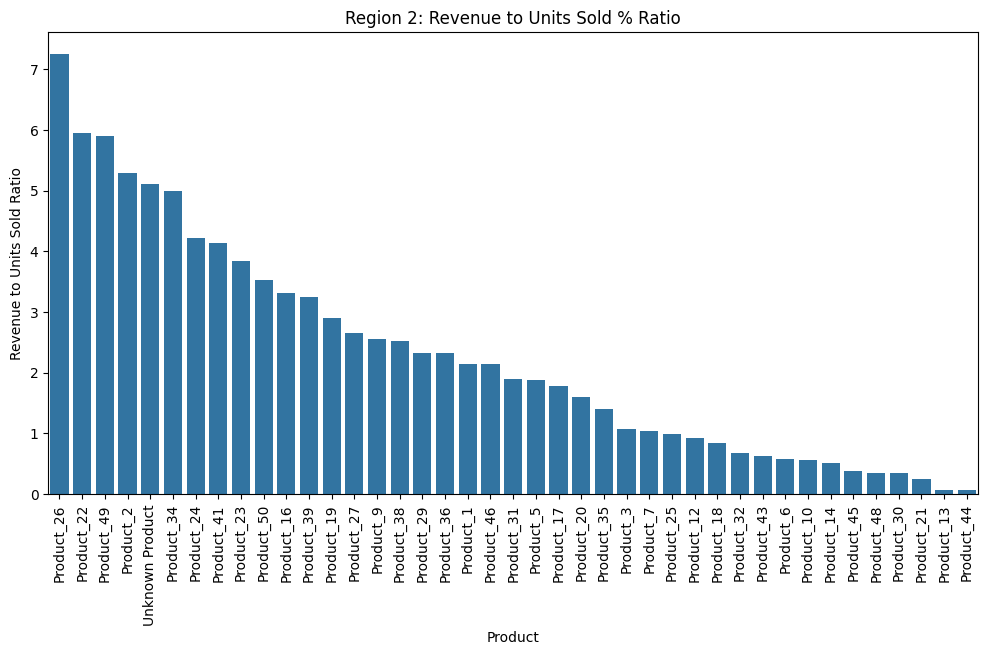

In [97]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped_ratio_region2_sorted, x='Product', y= 'Revenue to Units Sold Ratio')
plt.xticks(rotation=90)
plt.title('Region 2: Revenue to Units Sold % Ratio')
plt.show()

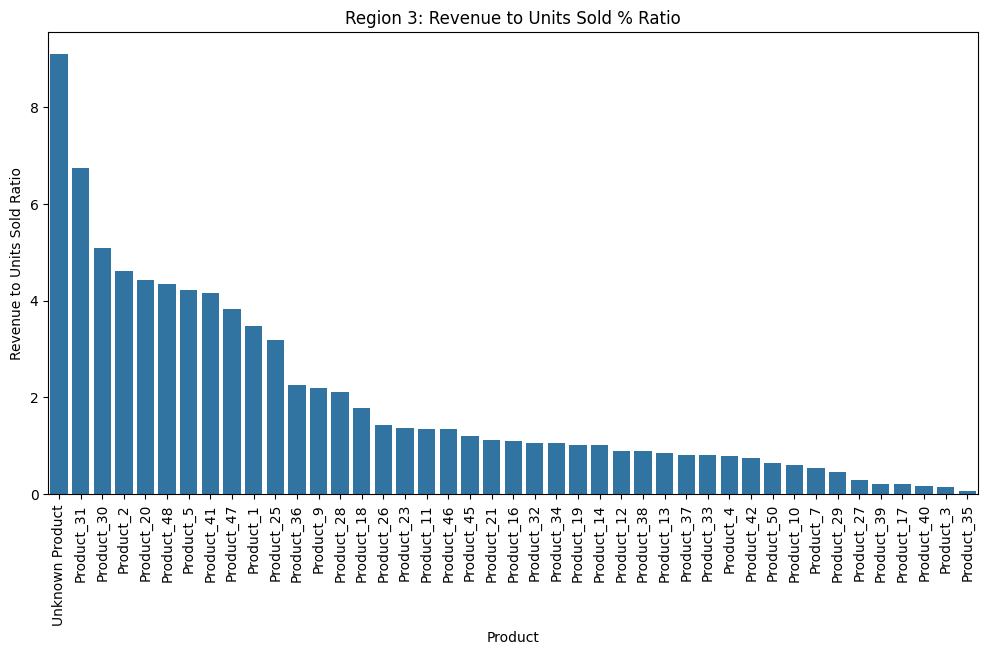

In [98]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped_ratio_region3_sorted, x='Product', y= 'Revenue to Units Sold Ratio')
plt.xticks(rotation=90)
plt.title('Region 3: Revenue to Units Sold % Ratio')
plt.show()

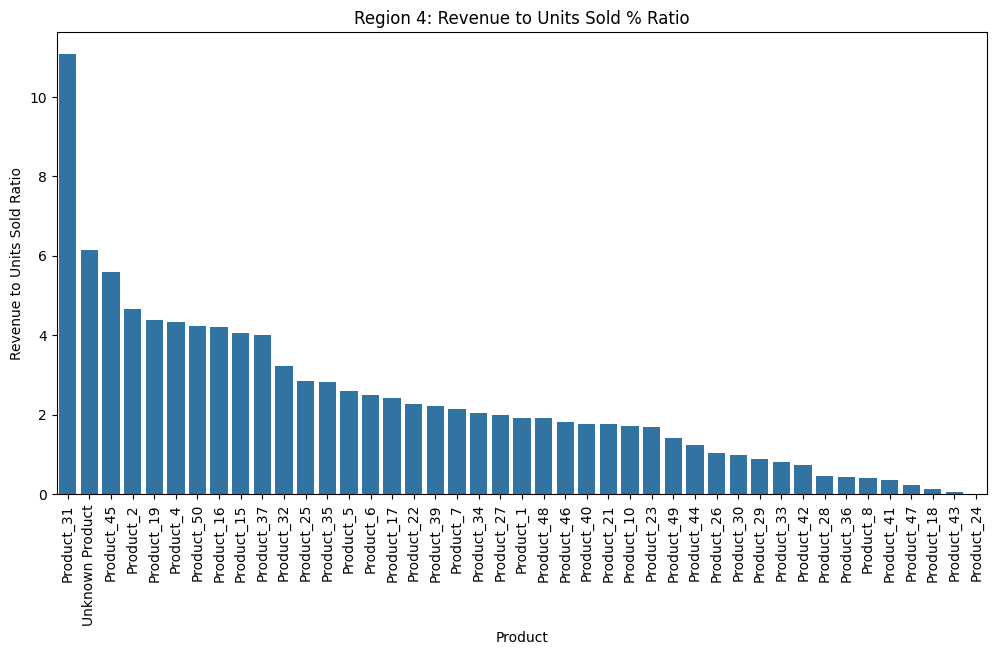

In [99]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped_ratio_region4_sorted, x='Product', y= 'Revenue to Units Sold Ratio')
plt.xticks(rotation=90)
plt.title('Region 4: Revenue to Units Sold % Ratio')
plt.show()

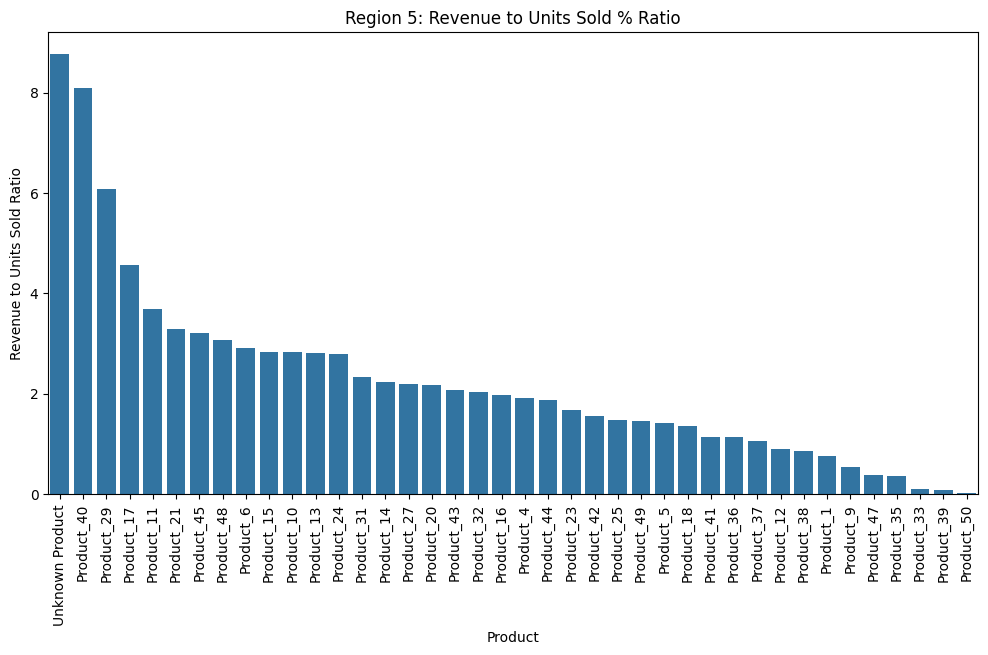

In [100]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped_ratio_region5_sorted, x='Product', y= 'Revenue to Units Sold Ratio')
plt.xticks(rotation=90)
plt.title('Region 5: Revenue to Units Sold % Ratio')
plt.show()

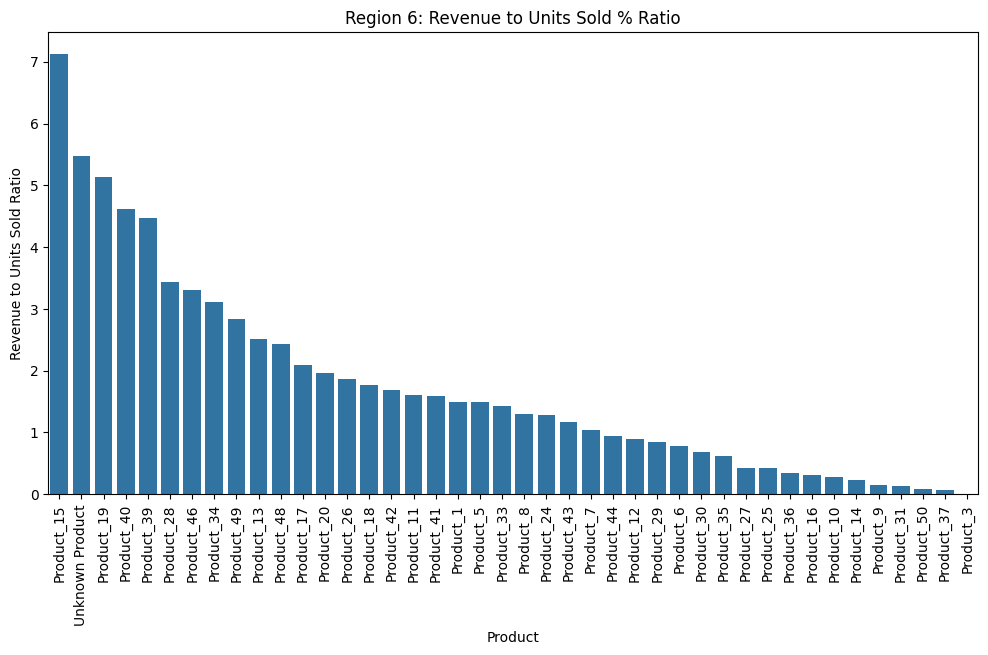

In [101]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped_ratio_region6_sorted, x='Product', y= 'Revenue to Units Sold Ratio')
plt.xticks(rotation=90)
plt.title('Region 6: Revenue to Units Sold % Ratio')
plt.show()

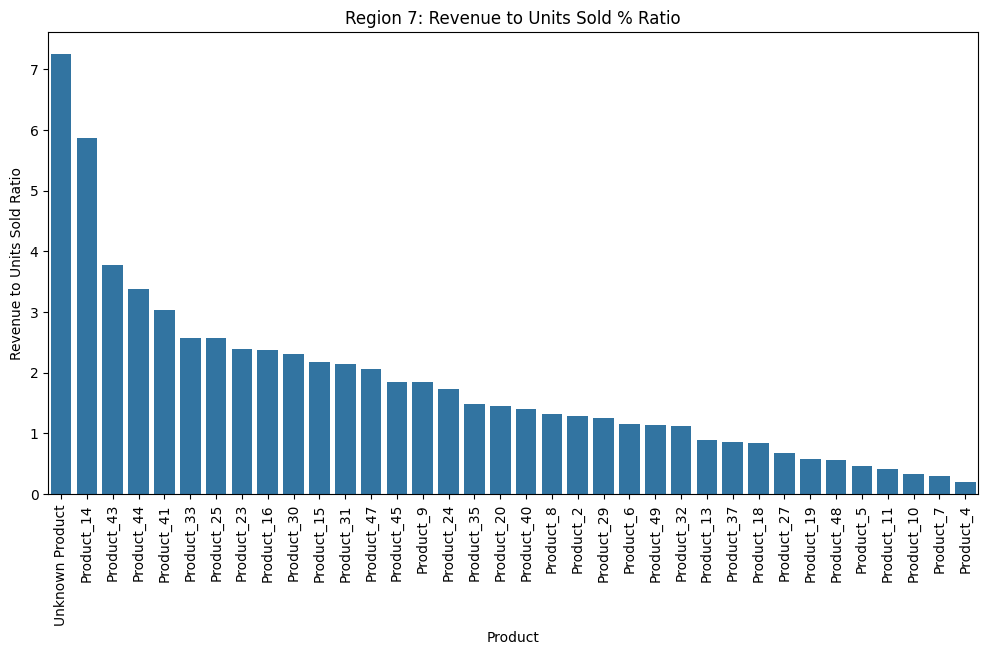

In [102]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped_ratio_region7_sorted, x='Product', y= 'Revenue to Units Sold Ratio')
plt.xticks(rotation=90)
plt.title('Region 7: Revenue to Units Sold % Ratio')
plt.show()

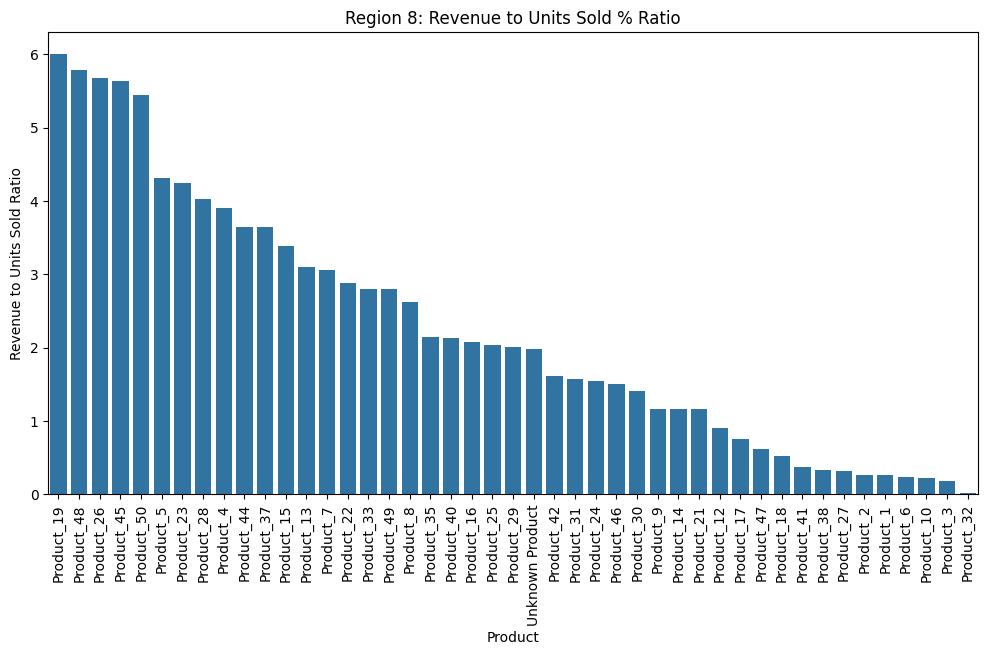

In [103]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped_ratio_region8_sorted, x='Product', y= 'Revenue to Units Sold Ratio')
plt.xticks(rotation=90)
plt.title('Region 8: Revenue to Units Sold % Ratio')
plt.show()

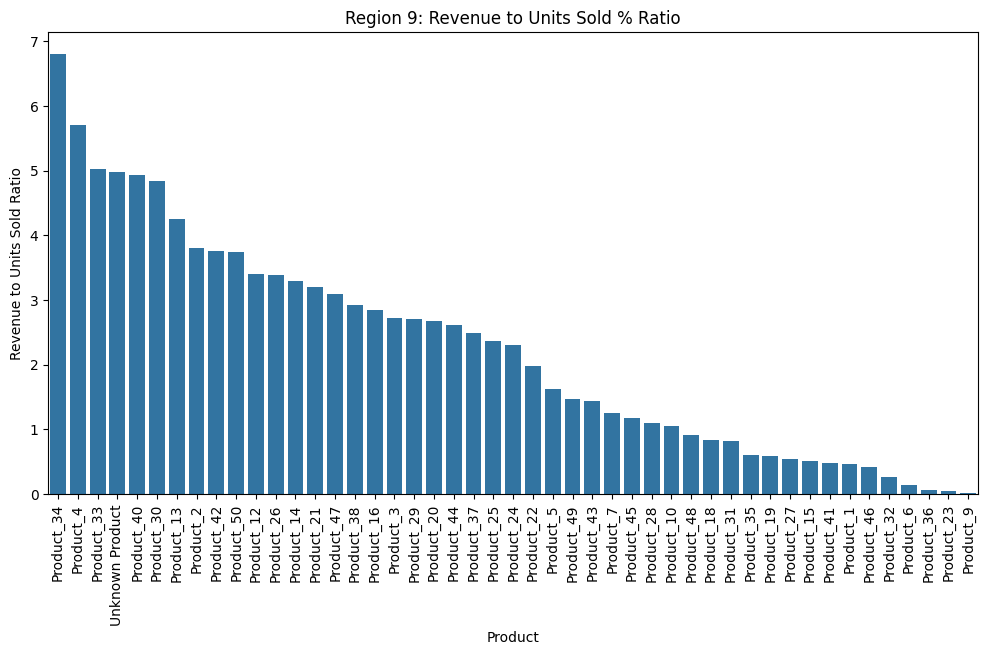

In [104]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped_ratio_region9_sorted, x='Product', y= 'Revenue to Units Sold Ratio')
plt.xticks(rotation=90)
plt.title('Region 9: Revenue to Units Sold % Ratio')
plt.show()

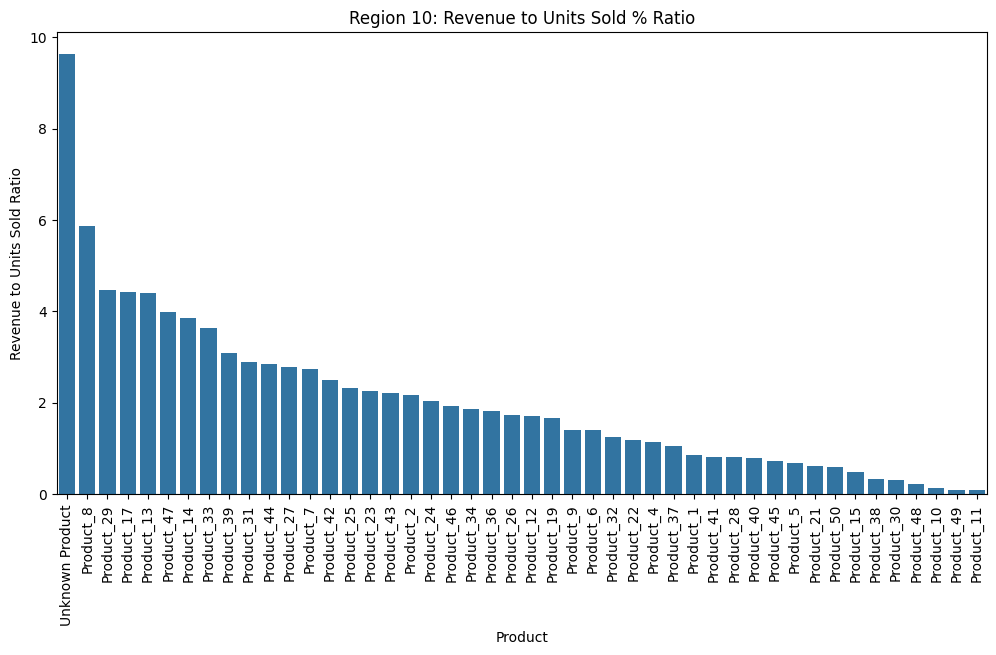

In [105]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped_ratio_region10_sorted, x='Product', y= 'Revenue to Units Sold Ratio')
plt.xticks(rotation=90)
plt.title('Region 10: Revenue to Units Sold % Ratio')
plt.show()

1) What conclusions can you draw about sales performance of various products and regions?

Since cost data on a per product basis was not available in order to determine profit margins per product,  I believe a good gauge on which product is performing best is the revenue generated to units sold basis. Assuming that profit margins are relatively consistent across product offerings, the products which are contributing the most in terms of revenue without requiring high levels of units pushed should be focussed on as each increase in unit sales for this product will lead to a higher increase in revenue generation. On the other side, those items that are selling in high amounts but are not contributing a high amount of revenue in relation to those units sold are likely using up additional resources (through high sales levels which result in higher processing costs) while not contributing as much revenue to the company. I believe this ratio is a good option for the company to use to make decisions, as the data used has been cleaned to ensure no random outliers exists. The ratio could be heavily influenced by outliers, thus this cleaning process was very important to ensure the ratio is an effective measure of product performance. The analysis concluded that the product perfomance varys heavily based on region, and each region has a clear top performing and bottom performing products. No region had flat results where all products performed somewhat the same. This result is great as it showcases that each region has produced actionable information.

Breaking down each these ratios by region and product showcases that each region has a highly varying performance when it comes to their product offerings. This means that decisions regarding product marketing and pricing would need to be made on a per region basis and not as a company wide policy. This is to say that customers in certain regions pay more for certain products, and less for others, and demand for certain products also varies, and thus revenue generation to units sold ratios vary based on location and decisions need to be made with this in mind.

2) What recommendations do you have for the business?

The business should create a marketing and pricing plan on a region by region basis. In each region, they should review which products rank high on their particular Revenue to Units Sold % Ratio. The business should focus resources on moving more units of the high ranking products, and possibly looking to increase the prices on it's lower ranking products. This will lead ideally to the following outcomes:
    (1) Placing more resources into selling the high ranking Revenue to Units Sold % Products per Region would mean that the company is placing it's resources in selling additional units of products that will result in the highest level of revenue generation for that particular region. Focussing on marketing towards the top 5 performing products in a particular region would be a great method in improving overall company revenue.
    (2) Those products who don't rank as highly, yet have high levels of unit sales, the company could look to increase those prices to in turn improve the revenue generation of those low ranking products. A high moving product which produces little in terms of revenue for the company simply takes up more resources for less payoff. The company should look to pull out additional revenue from these high moving products in order for it to improve its Revenue to Unit Sales ratio.

3) Describe your data cleaning approach. How and why did you decide on which cleaning techniques to use?

My initial approach was to look at utilizing the available data to fill in as much of the missing data as possible, interpreting available data to best assume what the value of the missing data would likely be. I first started with removing duplicates, which were likely sales entered twice accidentally.

For the missing price data, I simply took the average price of the corresponding product, and utilized that average price to fill in the null values. After that process was complete, there were 11 values left that also lacked Product data. For these, I decided to drop the values as they were insignificant to the data set overall. 
 
After this, I reviewed the product price data to see if there were any discrepancies. Here I found an outlier in price which listed a price far outside the normal price range. For this, I simply changed the value of that data to the average price of the corresponding product.
 
For the missing ‘Units Sold’ data, I decided that certain products often sell in certain quantities, thus my approach to fill in the missing ‘Units Sold’ data was to find the average unit’s sold amount per product. Whatever the product value in the row with missing sales data was, I filled that value with the average ‘Units Sale’ from that product. This left 7 entries still void, and I decided to drop these entries as well as they were insignificant and didn’t include any method to justify filling in the data in another way.
 
My initial approach for filling in missing product data was to compare the average product sale amount to the sale amount in the row with the empty product value, and whatever average sale amount was closest to the sale amount in the row with the missing value, that corresponding product would be placed in that row. However, after executing the code, I found that this tactic skewed the data significantly. Instead, I decided to fill these empty values with ‘Unknown Product’. Not only was this the only method I could think of that wouldn’t skew the data, it also enabled me to view just how significant an issue improper data entry was for the company.
 
For the missing region data, I also decided that there was no fair way to fill this in without making rash assumptions, so I instead filled this data field with ‘Unknown Region’. Since the data was relatively stable from region to region, I felt that not including the missing region data would not impact my overall ability to analyze the company and provide a solid recommendation for the year ahead.


